In [34]:
from math import pi
import matplotlib.pyplot as plt
from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now

## Generate data

$f(x)=0.2\sin(2\pi x)+0.8\cos^2(2\pi x)$

In [35]:
coef=2*pi
def my_objective(X):
    Y=0.2*np.sin(coef*X)+0.8*np.cos(coef*X)**2
    return Y

In [36]:
np.random.seed(2)
# X=np.random.uniform(-0.95,0.95,size=100,requires_grad=False)
# X = np.array([0.0, 0.08342367850375802, 0.18318251020106574, 0.3007356111824991, 0.5243630528152393, 0.6824476016827258, 0.952879423128048, 1.1774375709353138, 1.4910707362395683, 1.8264525501053952, 2.2419074609601632, 2.6618858124991758, 3.0])
# X = np.array([0.0, 0.08342367850375802, 0.18318251020106574, 0.3007356111824991, 0.5])
X = np.array([0.0, 0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724, 0.7931034482758621, 0.8275862068965517, 0.8620689655172413, 0.896551724137931, 0.9310344827586207, 0.9655172413793104, 1.0])

In [37]:
# Y=my_objective(X)
# Y= np.array([-0.001, -0.00041528812887825647, 0.00025517430484374545, 0.0009379129702730915, 0.0018011049776268354, 0.0021210550871378427, 0.0023468584951683398, 0.002367243059609783, 0.002243680444979725, 0.0019197060057590694, 0.0011995205118650479, 0.000391464309120407, 0.00013429105465252782])
# Y= np.array([0.38399110000000003, 0.3838941812236657, 0.3831899421241309, 0.38172837464236653, 0.37973497570501347, 0.37834396454167524, 0.37734002780076376, 0.3768314405714205, 0.37632329592222225, 0.37564195262090877, 0.37490976903397416, 0.37565073949536915, 0.3769239598340501])
# Y= np.array([0.38399110000000003, 0.383948618458542, 0.3833812626222834, 0.382149128940879, 0.37989028218685367])
# Y= np.array([0.38399110000000003, 0.3840170742666061, 0.3839828869051081, 0.38388080507535627, 0.3837084525832887, 0.3834687819772455, 0.3831695665609072, 0.3828221367988043, 0.38243947475520884, 0.38203501373261006, 0.38162167318117335, 0.38121007360346926, 0.380808830348092, 0.3804246331233159, 0.3800622459970958, 0.3797245073970667, 0.3794125382257852, 0.3791264976216649, 0.3788657684834297, 0.3786292586496905, 0.37841540822153996, 0.3782222796510877, 0.3780481110866354, 0.3778912225937809, 0.37774994280676005, 0.37762260892844646, 0.37750756673035174, 0.37740317055262523, 0.37730781807501274, 0.37722039327314166])
# Y= np.array([-0.001, -0.0007580147137268737, -0.0005161441431999838, -0.0002766038911236454, -4.18025498849465e-5, 0.0001858829809860607, 0.0004042486211053274, 0.00061142620138972, 0.0008059829500031706, 0.0009869224819214766, 0.0011536545062710009, 0.001306172995104811, 0.0014447317357374572, 0.0015697638660640935, 0.0016818818745604792, 0.0017818776002829885, 0.001870679797199183, 0.0019491785973206543, 0.0020182495977967077, 0.002078741699533259, 0.0021314780618791013, 0.002177279126120058, 0.0022167862698442642, 0.0022505610025300295, 0.0022791360315497383, 0.002303015262169852, 0.0023226737975509085, 0.002338557938747521, 0.002351074688623273, 0.0023604673736205262])
Y=np.array([-1.0, -0.7580154990560892, -0.5161437433812334, -0.2766048537207341, -0.041802674575424616, 0.1858833970784918, 0.4042480529018171, 0.6114303693104511, 0.8059786334143284, 0.9869146162730239, 1.153731102545101, 1.306287083509873, 1.4447964009065875, 1.569756535500465, 1.6818505996838096, 1.7818607204031671, 1.870659268765975, 1.9491714805132159, 2.01826958097265, 2.078783646966857, 2.131508852922671, 2.177205470871178, 2.2165986052292843, 2.2503340570846433, 2.278941382471026, 2.3029040274854604, 2.3226653388639713, 2.338628563981579, 2.351156850852302, 2.3605517871991557])

In [38]:
print(X.shape)
print(Y.shape)

(30,)
(30,)


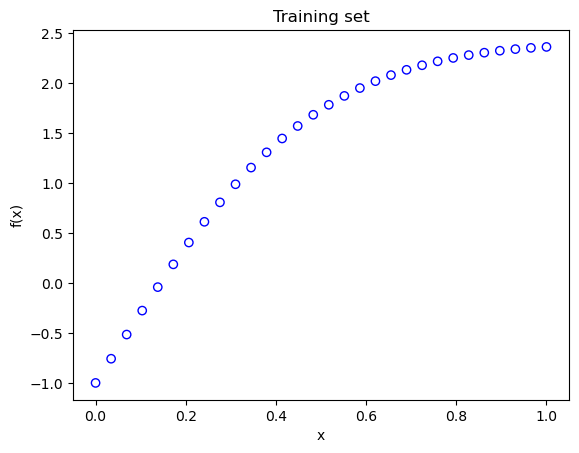

In [39]:
# plot data
plt.scatter(X,Y,facecolors='none', edgecolors='b')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Training set')
plt.savefig('1_measurement2_target.png')
plt.show()

## Set Device

In [40]:
num_qubits=2
dev=qml.device('default.qubit', wires=num_qubits)

## Define embedding layer

In [41]:
# define my own embedding layer
def myembedding(x,wires):
    qml.RY(coef*x, wires=wires[1])

## Define the Hamiltonian matrix transformation layer

In [42]:
def Ham():
    obs=[]
    for j in range(num_qubits):
        obs.append(qml.PauliX(j))
        for k in range(j):
            obs.append(qml.PauliZ(j)@qml.PauliZ(k))
    coeffs=np.random.uniform(-1,1,len(obs))*10
    qml.Hamiltonian(coeffs, obs)

## Define ansatze

In [43]:
# define ansastz layer
def layer(theta):
    
    # Apply Hamiltonian matrix
    Ham()
    
    # Apply H gate
    qml.Hadamard(0)
    
    # rotations on qubit 1
    qml.RY(theta,wires=1)
    
    # CNOT
    qml.CNOT(wires=[0, 1])

In [44]:
@qml.qnode(dev)
def quantum_net(theta,x):
    
    # encode data
    myembedding(x,wires=range(num_qubits))
    
    # parameterized circuit layers
    for v in theta: # (for lool along with the first dimension)
        # print(v)
        # Ham()
        layer(v)
    
    qml.Hadamard(0)
    
    return qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1))

In [45]:
num_layers=4
theta=np.random.uniform(0,2*pi,size=(num_layers,num_qubits-1),requires_grad=True)
print(theta.shape)
print(theta)

(4, 1)
[[2.73943676]
 [0.16289932]
 [3.4536312 ]
 [2.73521126]]


In [46]:
quantum_net(theta,0)

(tensor([0.36737979], requires_grad=True),
 tensor([-0.98880068], requires_grad=True))

In [47]:
print(qml.draw(quantum_net)(theta,0))

0: ──H────────────────╭●──H──────╭●──H──────╭●──H──────╭●──H─┤  <Z>
1: ──RY(0.00)──RY(M0)─╰X──RY(M1)─╰X──RY(M2)─╰X──RY(M3)─╰X────┤  <Z>


## Add classical layer

In [48]:
# add the classical layer
def classical_quantum_net(theta,w,x):
    r1=quantum_net(theta,x)[0]
    r2=quantum_net(theta,x)[1]
    return w[0]+w[1]*r1+w[2]*r1**2+w[3]*r2+w[4]*r2**2

In [49]:
def square_loss(labels,predictions):
    loss=0
    for l,p in zip(labels,predictions):
        loss=loss+(l-p)**2
    loss=loss/len(labels)
    return loss

In [50]:
def abs_loss(labels,predictions):
    loss=0
    for l,p in zip(labels,predictions):
        loss=loss+np.abs((l-p))
    loss=loss/len(labels)
    return loss

In [51]:
def cost(theta,w,features,labels):
    preds=[classical_quantum_net(theta,w,x) for x in features]
    # return square_loss(labels,preds)
    return abs_loss(labels,preds)

## Model training
Using the Adam optimizer, we update the weights for 100 steps (this takes some time). More steps will lead to a better fit.

In [52]:
w=np.zeros(5,requires_grad=True)
opt = AdamOptimizer(0.05, beta1=0.9, beta2=0.999)

In [53]:
start=now()
print(start)

2023-08-01 23:59:32.949537


In [54]:
epochs=100
for e in range(1,epochs+1):
    
    (theta,w,_,_),_cost=opt.step_and_cost(cost,theta,w,X,Y)

    if e==1 or e%10==0:
        print(f'Epoch: {e} | Cost: {_cost} | w: {w}')

Epoch: 1 | Cost: [1.50575611] | w: [ 0.04999998 -0.04999958  0.04999909  0.04999994  0.04999994]
Epoch: 10 | Cost: [0.93371591] | w: [ 0.48697295 -0.46985381  0.48298248  0.47408939  0.49022444]
Epoch: 20 | Cost: [0.74245997] | w: [ 0.7556816  -0.47605309  0.38683866  0.5477108   0.58849624]
Epoch: 30 | Cost: [0.58940253] | w: [ 1.08260856 -0.7365343   0.10069398  0.78398165  0.49925211]
Epoch: 40 | Cost: [0.48794783] | w: [ 1.37998774 -0.65205147 -0.26592279  0.78003633  0.3231044 ]
Epoch: 50 | Cost: [0.40790275] | w: [ 1.6041326  -0.63632751 -0.71437635  0.80290514  0.19025046]
Epoch: 60 | Cost: [0.36271678] | w: [ 1.81633868 -0.58254535 -0.8568267   0.86260342  0.19819241]
Epoch: 70 | Cost: [0.33437379] | w: [ 1.89122341 -0.54439727 -1.03624103  0.94886762  0.25439781]
Epoch: 80 | Cost: [0.33394604] | w: [ 1.87062808 -0.5881058  -1.15237189  0.95289824  0.25537139]
Epoch: 90 | Cost: [0.33275282] | w: [ 1.8809504  -0.61376057 -1.0921013   0.91058895  0.24070761]
Epoch: 100 | Cost: [0

In [55]:
pred_train=np.array([classical_quantum_net(theta,w,x) for x in X])

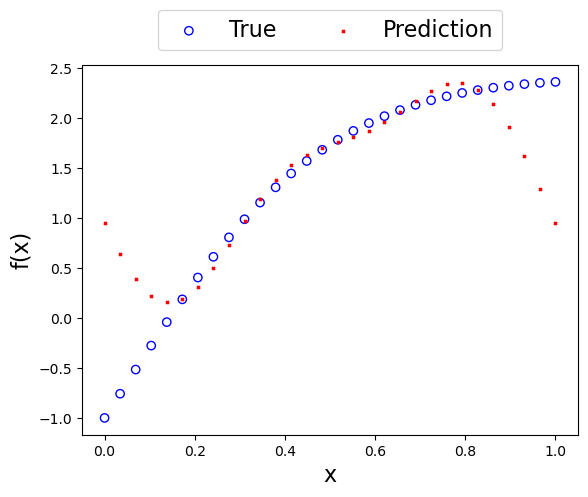

In [56]:
plt.figure()
plt.scatter(X,Y,facecolors='none', edgecolors='b', label='True')
plt.scatter(X,pred_train, color='red',marker="x",s=4,label='Prediction')
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper center',bbox_to_anchor=(0.5,1.18),ncol=2,fontsize=16)
plt.savefig('1_measurement2_train.png')
plt.show()

In [57]:
train_diff=np.abs(Y-pred_train)

In [58]:
np.max(train_diff)

tensor(3.34503445, requires_grad=True)

In [59]:
np.min(train_diff)

tensor(0.00202012, requires_grad=True)

In [60]:
np.mean(train_diff)

tensor(0.99629811, requires_grad=True)

## Test error

In [61]:
X_test=np.linspace(-0.95,0.95,200)
Y_test=my_objective(X_test)
test_pred=[classical_quantum_net(theta,w,x) for x in X_test]

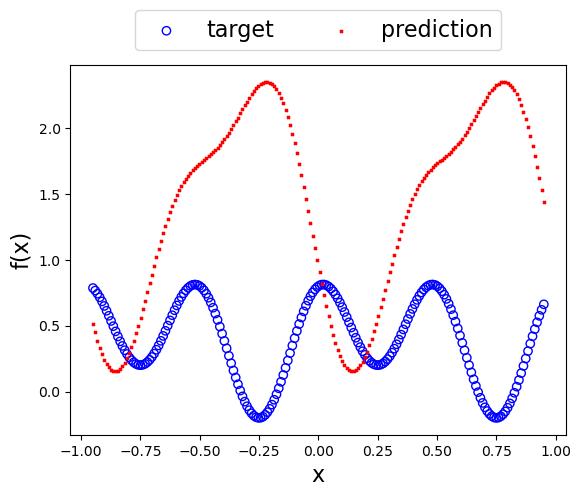

In [62]:
plt.figure()
plt.scatter(X_test,Y_test,facecolors='none', edgecolors='b',label='target')
plt.scatter(X_test,test_pred,color='red',marker="x",s=4,label='prediction')
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper center',bbox_to_anchor=(0.5,1.18),ncol=2,fontsize=16)
plt.savefig('1_measurement2_test.png')
plt.show()

In [63]:
test_diff=np.abs(Y_test-test_pred)

In [64]:
np.max(test_diff)

tensor(2.54893513, requires_grad=True)

In [65]:
np.min(test_diff)

tensor(0.00015698, requires_grad=True)

In [66]:
np.mean(test_diff)

tensor(1.11268965, requires_grad=True)